In [ ]:

from google.colab import files
# Step 3: Extract the RAR file
import os

# Assuming the uploaded file name is 'file.rar'
rar_file_path = '/content/data-rescaled.rar'  # Change this to your RAR file name if different
extract_folder = '/content/'  # Folder to extract files

# Create the extraction folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Extract the RAR file
!unrar x "{rar_file_path}" "{extract_folder}"

print(f'Extracted files to: {extract_folder}')



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data-rescaled.rar

Creating    /content/data-rescaled                                    OK
Creating    /content/data-rescaled/1000_back                          OK
Extracting  /content/data-rescaled/1000_back/IMG20211228225452.jpg         0%  OK 
Extracting  /content/data-rescaled/1000_back/IMG20211228225453.jpg         0%  OK 
Extracting  /content/data-rescaled/1000_back/IMG20211228225456.jpg         0%  OK 
Extracting  /content/data-rescaled/1000_back/IMG20211228225459.jpg         0%  OK 
Extracting  /content/data-rescaled/1000_back/IMG20211228225502.jpg         0%  OK 
Extracting  /content/data-rescaled/1000_back/IMG20211228225504.jpg         0%  OK 
Extracting  /content/data-rescaled/1000_back/IMG20211228225507.jpg         0%  OK 
Extracting  /content/data-rescaled/1000_back/IMG20211228225510.jpg         0%  OK

In [ ]:
pip install tensorflow scikit-learn opencv-python-headless matplotlib


# Step 1: Import Libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import layers, models


# Step 2: Load and Preprocess Images

In [ ]:
IMG_SIZE = 128

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 128x128
            images.append(img)
            labels.append(label)
    return images, labels

# Paths for the front and back of the notes
paths_labels = {
    "/content/data-rescaled/10_front": "10_front", "/content/data-rescaled/10_back": "10_back",
    "/content/data-rescaled/20_front": "20_front", "/content/data-rescaled/20_back": "20_back",
    "/content/data-rescaled/50_front": "50_front", "/content/data-rescaled/50_back": "50_back",
    "/content/data-rescaled/100_front": "100_front", "/content/data-rescaled/100_back": "100_back",
    "/content/data-rescaled/500_front": "500_front", "/content/data-rescaled/500_back": "500_back",
    "/content/data-rescaled/1000_front": "1000_front", "/content/data-rescaled/1000_back": "1000_back",
    "/content/data-rescaled/5000_front": "5000_front", "/content/data-rescaled/5000_back": "5000_back"
}

# Load all images and labels
all_images = []
all_labels = []

for path, label in paths_labels.items():
    images, labels = load_images_from_folder(path, label)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Normalize the images
all_images = all_images / 255.0


# Step 3: Encode Labels and Split Data

In [ ]:
# Encode labels into one-hot vectors
lb = LabelBinarizer()
all_labels = lb.fit_transform(all_labels)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)


# Step 4: Define the CNN Model

In [ ]:
# Build CNN Model
model = models.Sequential()

# First convolutional block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(lb.classes_), activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,446 (12.61 MB)

 Trainable params: 3,306,446 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Step 5: Train the Model

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.0792 - loss: 2.6495 - val_accuracy: 0.0526 - val_loss: 2.6392
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0735 - loss: 2.6394 - val_accuracy: 0.0622 - val_loss: 2.6399
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1004 - loss: 2.6327 - val_accuracy: 0.1134 - val_loss: 2.5199
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1718 - loss: 2.4176 - val_accuracy: 0.1646 - val_loss: 2.4239
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2855 - loss: 2.0786 - val_accuracy: 0.2476 - val_loss: 2.0708
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5089 - loss: 1.4721 - val_accuracy: 0.2877 - val_loss: 2.1442
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6741 - loss: 1.0011 - val_accuracy: 0.3748 - val_loss: 2.1118
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8174 - loss: 0.6022 - val_accuracy: 0.3513 - 

# Step 6: Evaluate Model Performance

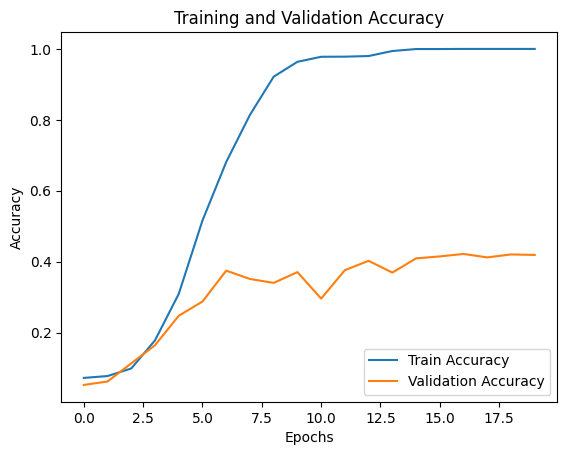

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4134 - loss: 4.5102
Test Accuracy: 0.41908714175224304


In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


# Step 7: Save the Model using pickle

In [ ]:
# Save model architecture and weights using pickle
with open('currency_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the label encoder for later use
with open('label_binarizer.pkl', 'wb') as f:
    pickle.dump(lb, f)


# Step 8: Load the Model for Real-Time Detection

In [ ]:
# Load the model and label encoder
with open('currency_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('label_binarizer.pkl', 'rb') as f:
    lb = pickle.load(f)

# Load and preprocess a new image for prediction
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 128x128
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict using the loaded model
    prediction = loaded_model.predict(img)
    predicted_class = lb.classes_[np.argmax(prediction)]
    return predicted_class

# Example usage
image_path = '/content/data-rescaled/100_front/IMG20211228215432.jpg'
predicted_note = predict_image(image_path)
print(f"Predicted Currency Note: {predicted_note}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
Predicted Currency Note: 100_front


# Data Augmentation to reduce over fitting


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model using augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.2053 - loss: 3.0201 - val_accuracy: 0.2960 - val_loss: 1.8937
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.3148 - loss: 1.9850 - val_accuracy: 0.4550 - val_loss: 1.4529
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.3946 - loss: 1.5997 - val_accuracy: 0.4730 - val_loss: 1.3435
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.4549 - loss: 1.3932 - val_accuracy: 0.4633 - val_loss: 1.5260
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.4622 - loss: 1.3947 - val_accuracy: 0.5173 - val_loss: 1.2264
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.4961 - loss: 1.2488 - val_accuracy: 0.4924 - val_loss: 1.3213
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.5278 - loss: 1.2458 - val_accuracy: 0.5145 - val_loss: 1.1889
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.5718 - loss: 1.0448 - val_accuracy: 0.586

In [ ]:
# Train the model using augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=50)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.7135 - loss: 0.7318 - val_accuracy: 0.6418 - val_loss: 0.8657
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.7232 - loss: 0.6634 - val_accuracy: 0.6390 - val_loss: 0.9684
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.7543 - loss: 0.6446 - val_accuracy: 0.7040 - val_loss: 0.7367
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.7651 - loss: 0.5816 - val_accuracy: 0.6999 - val_loss: 0.8221
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.7612 - loss: 0.6223 - val_accuracy: 0.7206 - val_loss: 0.7375
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.7637 - loss: 0.5988 - val_accuracy: 0.6680 - val_loss: 0.8314
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.7819 - loss: 0.5683 - val_accuracy: 0.6943 - val_loss: 0.8264
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - accuracy: 0.7806 - loss: 0.5739 - val_accu

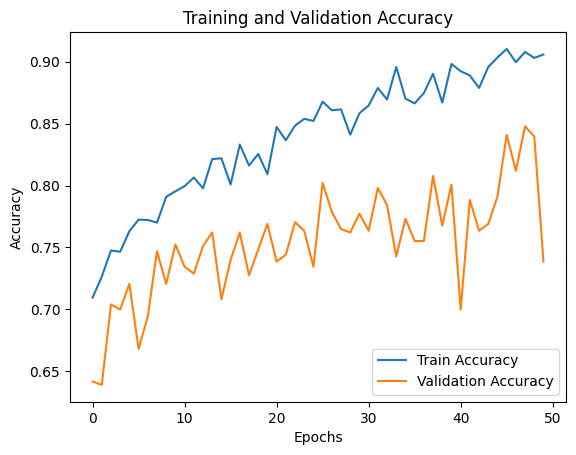

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7447 - loss: 0.9375
Test Accuracy: 0.7385892271995544


In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
# Save model architecture and weights using pickle
with open('currency_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the label encoder for later use
with open('label_binarizer.pkl', 'wb') as f:
    pickle.dump(lb, f)

In [ ]:
# Load the model and label encoder
with open('currency_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('label_binarizer.pkl', 'rb') as f:
    lb = pickle.load(f)

# Load and preprocess a new image for prediction
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 128x128
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict using the loaded model
    prediction = loaded_model.predict(img)
    predicted_class = lb.classes_[np.argmax(prediction)]
    return predicted_class

# Example usage
image_path = '/content/data-rescaled/100_front/IMG20211228215432.jpg'
predicted_note = predict_image(image_path)
print(f"Predicted Currency Note: {predicted_note}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Predicted Currency Note: 100_front
